# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as cmx
import matplotlib.colors as colors

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Ravi, Nikhila]

### Part (b): Course Number

[AC 209a]

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

Solution:

In [2]:
#compute stats and store them in a dataframe
#read data into pandas df
data = pd.read_csv('dataset_HW1.txt')

#size of data frame
print 'number of patients:', data.shape[0]

#print head
data.head(n=5)
column_names = data[range(1, 5)].columns.values
stats = pd.DataFrame(columns=column_names)

def find_stats(stats, df):
    stats.loc['max'] = df[range(1, 5)].max()
    stats.loc['min'] = df[range(1, 5)].min()
    stats.loc['range'] = df[range(1, 5)].max() - df[range(1, 5)].min()
    stats.loc['median'] = df[range(1, 5)].median()
    stats.loc['mean'] = df[range(1, 5)].mean()
    stats.loc['std'] = df[range(1, 5)].std()
    return stats

stats = find_stats(stats, data)
stats.head(n=6)

number of patients: 2300


,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.000000,90.000000
min,-22.591722,-56.388949,0.000000,3.000000
range,102.801470,420.610725,3.000000,87.000000
median,33.743705,105.179291,1.000000,35.000000
mean,31.970053,105.974247,1.086957,38.868261
std,18.096490,52.306201,0.928643,27.211950


### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [3]:
stats.head(n=6)

,marker_1,marker_2,subtype,patient_age
max,80.209748,364.221777,3.000000,90.000000
min,-22.591722,-56.388949,0.000000,3.000000
range,102.801470,420.610725,3.000000,87.000000
median,33.743705,105.179291,1.000000,35.000000
mean,31.970053,105.974247,1.086957,38.868261
std,18.096490,52.306201,0.928643,27.211950


In [4]:
# Descriptive stats for samples of the population
children = data[(data['patient_age'] < 18)]
adults = data[(data['patient_age'] > 18)]
adult_males = adults[(adults['patient_gender'] =='male')]
adult_females = adults[(adults['patient_gender'] =='female')]

In [5]:
child_stats = pd.DataFrame(columns=children[range(1, 5)].columns.values)
child_stats = find_stats(child_stats, children)
print 'CHILDREN'
child_stats.head(n=6)

CHILDREN


,marker_1,marker_2,subtype,patient_age
max,80.209748,171.429357,3.000000,17.000000
min,-22.591722,70.538569,0.000000,3.000000
range,102.801470,100.890788,3.000000,14.000000
median,26.868357,121.799063,1.500000,10.000000
mean,26.267379,121.396907,1.500000,10.106250
std,24.972128,23.658433,1.118733,4.307337


In [6]:
adult_males_stats = pd.DataFrame(columns=adult_males[range(1, 5)].columns.values)
adult_males_stats = find_stats(adult_males_stats, adult_males)
print 'ADULT MALES'
adult_males_stats.head(n=6)

ADULT MALES


,marker_1,marker_2,subtype,patient_age
max,40.458624,364.221777,2.000000,90.000000
min,1.860516,-56.388949,0.000000,19.000000
range,38.598108,420.610725,2.000000,71.000000
median,26.245269,110.942881,1.000000,55.000000
mean,24.718502,124.946872,1.290698,54.367733
std,6.970268,57.720168,0.701278,20.945481


In [7]:
adult_females_stats = pd.DataFrame(columns=adult_females[range(1, 5)].columns.values)
adult_females_stats = find_stats(adult_females_stats, adult_females)
print 'ADULT FEMALES'
adult_females_stats.head(n=6)

ADULT FEMALES


,marker_1,marker_2,subtype,patient_age
max,59.702106,190.047718,1.000000,90.000000
min,28.364561,-43.386768,0.000000,19.000000
range,31.337545,233.434486,1.000000,71.000000
median,43.911078,73.062338,0.000000,57.000000
mean,44.081479,74.148346,0.499361,55.408685
std,7.132370,53.650554,0.500319,20.612030


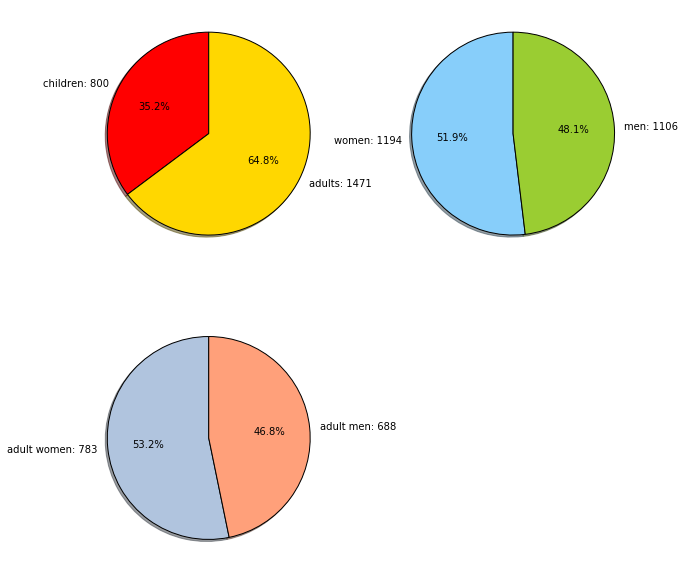

In [8]:
num_children = children.shape[0]
num_adults = adults.shape[0]
num_adult_men = adult_males.shape[0]
num_adult_women = adult_females.shape[0]

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.pie([num_children, num_adults], 
        labels=['children: ' + str(num_children), 'adults: ' + str(num_adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = data[data['patient_gender'] == 'female'].shape[0]
men = data.shape[0] - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

ax3 = fig.add_subplot(223)
ax3.pie([num_adult_women, num_adult_men], 
        labels=['adult women: ' + str(num_adult_women), 'adult men: ' + str(num_adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

#### Discussion

**Explain what these stats say about the entire dataset as well as each of the above subsets**

In the dataset, approx 33% of the people are children and approx 67% are adults. The mean and median ages (38 and 35 respectively) also indicate larger number of adults than children in the population. The overall ratio of male to female is approximately 0.5 with slightly more women than men (~1%) and there are more adult females than males (~53% vs ~47%).

Patients can have one of four possible disease subtypes: 0, 1, 2, or 3, with the mean and median subtypes being type 1. Adult women have either subtype 0 or 1, adult males have types 0, 1, 2 whereas children have any of the four types.

Considering the biometric marker values, there is a larger range in the marker 2 values than marker 1 values and also a larger spread in the values of marker 2 compared to marker 1 (from the standard deviation).

The range in the marker 1 values are smaller for adults compared to children and the overall sample.

The mean marker 2 value for adult females is lower than for adult males and children, but the mean marker 1 value in adult females is much higher than in the other two groups. 

The range of marker 2 values is smallest in children and largest for adult men but the range is marker 1 values is largest for children and smallest for adult females.  
 

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

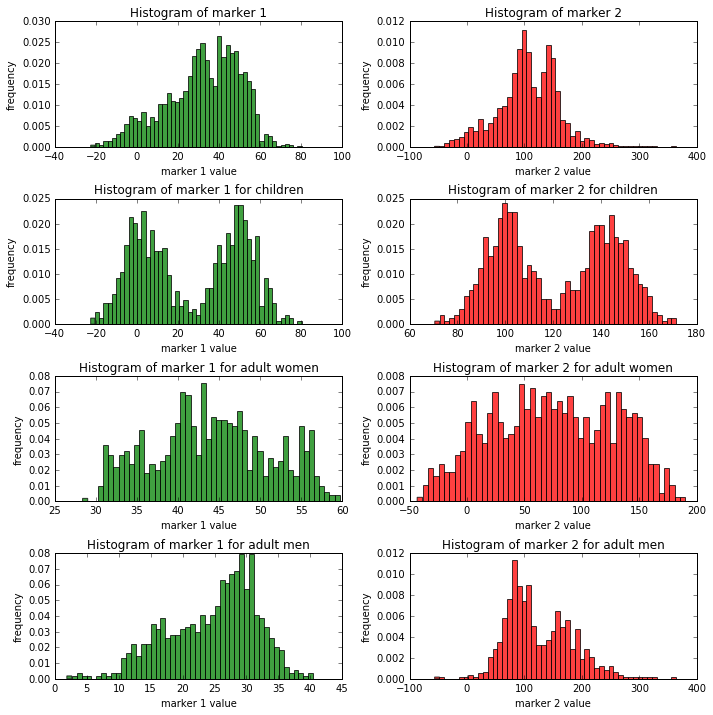

In [9]:
# HISTOGRAMS
# plot with different bin sizes
# for i in range(5, 50,5):
#     data.plot(y='marker_2', kind='hist', bins=i, title=i)

df = data
def plot_hist(data, title, x_lab, face, ax):
    ax.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('frequency')
    
    return ax
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(df[df['patient_age'] < 18]['marker_1'],
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(df[df['patient_age'] < 18]['marker_2'],
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]['marker_1'],
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]['marker_2'],
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]['marker_1'],
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]['marker_2'],
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

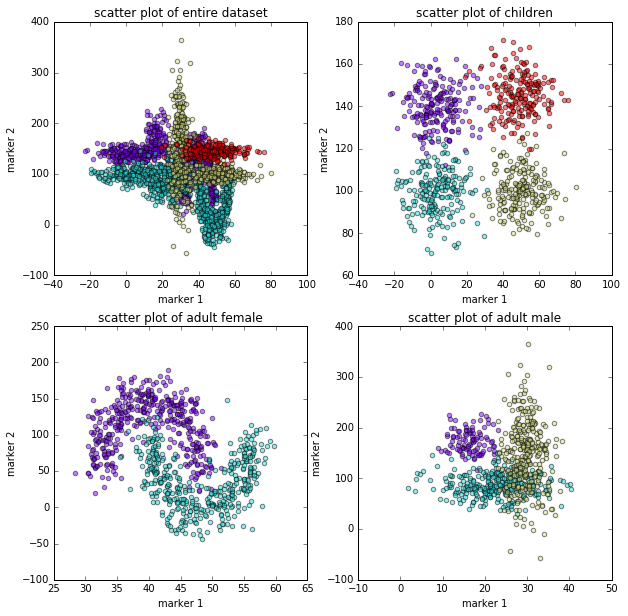

In [10]:
# SCATTER PLOTS
def plot_scatter(data, title, x_lab, y_lab, ax):
    # plot data
    values = np.linspace(0, 1, 4)
    cm = plt.get_cmap('rainbow') 
    cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    
    for k in xrange(4):
        colorVal = scalarMap.to_rgba(values[k])
        ax.scatter(data[data['subtype'] == k]['marker_1'], data[data['subtype'] == k]['marker_2'], c=colorVal, alpha = 0.5)

    ax.set_title(title) 
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', ax1)  
plot_scatter(df[df['patient_age'] < 18], 'scatter plot of children', 'marker 1', 'marker 2', ax2)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')], 'scatter plot of adult female', 'marker 1', 'marker 2', ax3)  
plot_scatter(df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')], 'scatter plot of adult male', 'marker 1', 'marker 2', ax4)  
plt.show()

### Discussion

The occurence of disease subtype 2 is in two distinct bands forming a 'T' like shape - a narrow range of marker 1 values and a large range of marker 2 values and a narrow range of marker 2 values and a wide range of marker 1 values. The occurence of disease subtype 0 and 1 is spread across a much larger range of marker 1 values and a smaller range of marker 2 values.

The plot also shows that very similar marker value combinations can result in different disease subtypes - there is a lot of overlap between points with different disease subtypes.

Disease subtype 3 only occurs in a very small range of marker 1 and marker 2 values. 

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

******************

**Solution:**

### Histograms 
- in the histograms of (both Marker 1 and Marker 2) for the entire data set, it looks like there might be multiple modes, but it's not entirely clear that this is not due to noise. 
- in the histograms of (both Marker 1 and Marker 2) for children, it is very clear that the distribution for Marker 1 and Marker 2 are bimodal, with peaks at 0, and 50 for marker 1 and 100 and 150 for marker 2. That is the children dataset falls into two distinct groups based on their Marker 1 biometric and two distinct groups based on their Marker 2 biometric. Note: It's not clear if the subgrouping by the two markers are the same or different! 
- in the histograms of (both Marker 1 and Marker 2) for adult women, the distributions looks unimodal although the peaks are not very distinct. 
- in the histogram of Marker 1 for adult men, the distribution looks unimodal; the histogram of Marker 2 for adult men looks bimodal


### Scatter Plots 
- It appears that while the over all dataset has four disease subtypes, all four are present only in children. There are only two subtypes present for adult women and three for adult men. 
- In the scatter plot (color code by disease subtype) for the entire dataset, there doesn't seem to be clear separation between the data points in the different subtypes. 
- The scatter plot for children shows four distinct clusters for the four different subtypes of the disease, each cluster concentrated around a "centroid". 
- The data for adult females also has distinct crescent shaped clusters for subtypes 0 and 1
- For Adult males the subtypes are less distinct with a cluster for subtype 0 but large overlap in the occurence of subtype 1 and 2.

Comparison of Visualizations and Stats 
- The modes in the histogram correspond to clustering of the biometric data by disease subtype. 
- Using the histogram alone, we cannot necessarily deduce the distribution of the scatter plots. 
- With the scatter plots, the marker values which characterise each disease subtype can be clearly seen, whereas using the histograms alone, we cannot deduce clustering by disease subtypes. The modes in the histogram can only tell us where the data is concentrated along which axis.
- The stats we calculated for the entire dataset also give no indication of the patterns we see in the scatter plots.

Conclusion 
- The characterisation of disease subtypes by marker value depends on the subgroup of the individual within the population - for each demographic groups, it looks like biometric data cluster by disease type
- Some clusters are more distinct than others - the clusters are well separated for children, the separation is along both the Marker 1 and Marker 2 axes. The separation is not so clear for the other two groups.

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In [11]:
subtype_0 = children[children['subtype'] == 0.0]
subtype_1 = children[children['subtype'] == 1.0]
subtype_2 = children[children['subtype'] == 2.0]
subtype_3 = children[children['subtype'] == 3.0]

mean_0 = subtype_0.iloc[:, 1:3].mean()
mean_1 = subtype_1.iloc[:, 1:3].mean()
mean_2 = subtype_2.iloc[:, 1:3].mean()
mean_3 = subtype_3.iloc[:, 1:3].mean()

print 'Marker 1', '\tMarker 2'
print mean_0[0], mean_0[1]
print mean_1[0], mean_1[1]
print mean_2[0], mean_2[1]
print mean_3[0], mean_3[1]

Marker 1 	Marker 2
3.27981992225 140.149140174
3.32540268905 99.7043767639
49.942424999 100.196777456
48.5218676577 145.537334109


The scatter plot of marker 1 and 2 values for children show that there are distinct clusters for each of the four disease subtypes with little overlap - there is low level of mixture between subtypes and the points are clustered around a 'centroid'. If the marker 1 and 2 values are known for a patient, the disease subtype could be classified based on how close it is to the 'centroid' (i.e. the mean) of a subtype cluster. 

The percentage of correct classification gives an indication of the probability of a successful classification (i.e. number of favourable outcomes/total number of outcomes). It shows how accurate the classifier is at determining the subtype of the patient based on the similarity to a cluster of training points with the same subtype. However, the evaluation will be affected by the number of patients in each training group. If there are only a few patients of one subtype in the training set and if these points are scattered widely, then the standard deviation for the cluster will be high, and comparing the euclidian distance of a patient to the mean of a cluster will not be a good measure of the similarity between the test patient and the training patients of that subtype. 

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

In [12]:
## Create test and training sets
train=children.sample(frac=0.7)
test=children.drop(train.index)

def classify(training, testing):
    centroids = calculate_cluster_means(training)
    classified_patients = pd.DataFrame()
    for index, p in testing.iterrows():
        subtype = calculate_nearest_cluster(p[1:3], centroids)
        patient = p[0:3]
        patient.loc['subtype'] = subtype
        classified_patients = classified_patients.append(patient)
    return classified_patients

def calculate_cluster_means(training):
    subtype_0 = training[training['subtype'] == 0.0]
    subtype_1 = training[training['subtype'] == 1.0]
    subtype_2 = training[training['subtype'] == 2.0]
    subtype_3 = training[training['subtype'] == 3.0]
    mean_0 = subtype_0.iloc[:, 1:3].mean()
    mean_1 = subtype_1.iloc[:, 1:3].mean()
    mean_2 = subtype_2.iloc[:, 1:3].mean()
    mean_3 = subtype_3.iloc[:, 1:3].mean()
    return [mean_0, mean_1, mean_2, mean_3]

def euclid_dist(p1, p2):
    difference = p1 - p2
    return sum(difference * difference) ** 0.5
        
def calculate_nearest_cluster(p, centroids):
    smallestDistance = euclid_dist(p, centroids[0])
    subtype = 0
    for i in range(len(centroids)):
        distance = euclid_dist(p, centroids[i])
        if distance < smallestDistance:
            smallestDistance = distance
            subtype = i
    return subtype

def evaluate(actual_types, predicted_types):
    n = len(actual_types)
    correct_predictions = sum([1 for i in range(n) if (actual_types[i] == predicted_types[i])])
    incorrect_predictions = n - correct_predictions
    result = correct_predictions/float(n)
    return [result, correct_predictions, incorrect_predictions]

result = evaluate(test['subtype'].tolist(), classify(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

Percentage of patients accurately classified: 97.5  %
Number of correct classifications:  234 
Number of incorrect classifications:  6


### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [13]:
train=adult_males.sample(frac=0.7)
test=adult_males.drop(train.index)
result = evaluate(test['subtype'].tolist(), classify(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

print '\n\nprobabilities from assigning all male patients the mean subtype for males:'
### ASSIGN ALL patients the mean subtype
result = evaluate(np.ones(test.shape[0]), classify(train, test)['subtype'].tolist())
print '\nPercentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2],

Percentage of patients accurately classified: 65.0485436893  %
Number of correct classifications:  134 
Number of incorrect classifications:  72 

probabilities from assigning all male patients the mean subtype for males:

Percentage of patients accurately classified: 52.427184466  %
Number of correct classifications:  108 
Number of incorrect classifications:  98


In [14]:
train=adult_females.sample(frac=0.7)
test=adult_females.drop(train.index)
result = evaluate(test['subtype'].tolist(), classify(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

Percentage of patients accurately classified: 81.7021276596  %
Number of correct classifications:  192 
Number of incorrect classifications:  43


###### Discussion

The percentage of correct classification for children is 96% percent with less than 10 test patients being incorrectly classified, indicating high accuracy of the classifier. 

**Is our method of classifying disease subtypes valid for adult male and adult female patients? Explain why our method of classifying disease subtypes is or is not valid for adult data**

The percentage of correct classification for adult females is ~82-86% indicating the classifier is still valid for female patients but with a lower degree of accuracy than for children

For the adult male test patients, the classifier had much higher error rate with ~70 test patients incorrectly classified and an overall success rate of ~64%. 

The scatter plots for adult data do not have distinct clusters for each subtype of disease with several overlapping areas between different subtypes - i.e. combinations of marker values which result in multiple disease types. 
This increases the ambiguity in the classsification of the test patients as the patient's biometric marker values may lie in a region of values which has multiple subtypes. 

However, both percentages are significantly better than alternative options such as:
- a) random assignment of one of the possible subtypes which would only have probability of success of 33% for females (as only three subtypes present) or 50% for males (as two subtypes present)
- b) assignment of the mean subtype to all test patients (which results in success rate of ~50% for males) 

Therefore this classifier is still a valid method for adults.

## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

For adult males and adult females there are several regions of overlap between marker values and the resulting subtype so it is harder to extract distinct clusters from the data. In addition spread of marker values for different subtypes leads to further errors. By comparing data points directly, the skewing effect of spread on the mean of the cluster can be avoided, and it could also help in reducing ambiguity in overlapping areas. 

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [15]:
def classify_2(train_df, test_df):
    # asuumer p test samples and q training samples
    test = test_df.as_matrix(['marker_1', 'marker_2']) # p x 1 array
    train = train_df.as_matrix(['marker_1', 'marker_2']) # q x 1 array
    # p x q matrix of euclidian distances
    euclid_dist_matrix = np.asarray([[np.linalg.norm(test[i,:] - train[j,:]) for j in range(train.shape[0])] for i in range(test.shape[0])])
    nearest_neighbour = np.argmin(euclid_dist_matrix, axis=1) # find index of the minimum along the q axis  
    classified_patients = pd.DataFrame() # new DF to store classified patients
    # need to extract the actual row indices of the training patients 
    train_indices = train_df.index.values.tolist()
    i = 0 # the index 'j' in iterrows below returns the row index from the original data frame - not linear 
    for j, p in test_df.iterrows():
        patient = p[0:3]
        index = train_indices[nearest_neighbour[i]]
        subtype = train_df['subtype'][index]
        patient.loc['subtype'] = subtype
        classified_patients = classified_patients.append(patient)
        i += 1
    return classified_patients

In [16]:
train=children.sample(frac=0.7)
test=children.drop(train.index)
result = evaluate(test['subtype'].tolist(), classify_2(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

Percentage of patients accurately classified: 96.25  %
Number of correct classifications:  231 
Number of incorrect classifications:  9


In [17]:
train=adult_males.sample(frac=0.7)
test=adult_males.drop(train.index)
result = evaluate(test['subtype'].tolist(), classify_2(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

Percentage of patients accurately classified: 82.0388349515  %
Number of correct classifications:  169 
Number of incorrect classifications:  37


In [18]:
train=adult_females.sample(frac=0.7)
test=adult_females.drop(train.index)
result = evaluate(test['subtype'].tolist(), classify_2(train, test)['subtype'].tolist())
print 'Percentage of patients accurately classified:', result[0]*100, ' %'
print 'Number of correct classifications: ', result[1], 
print '\nNumber of incorrect classifications: ', result[2], 

Percentage of patients accurately classified: 95.7446808511  %
Number of correct classifications:  225 
Number of incorrect classifications:  10


### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

Overall, the second classifier performs better for all three data sets compared to the first classifier. For the child patient data, both classifiers have very similar success rates ~97% because of the distinct separation between clusters of the subtypes which leads to little ambiguity in the classification. 

For adult male data, the second classifier performs significantly better (~83% vs 61%) and a similar improvement in the classification is seen for adult female data (~97% vs 86%). The second classifier is better able to deal with classifying test patients whose marker values lie in a region of overlap between different subtypes as the values are compared directly instead of being compared to the mean of the cluster. 

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

In [19]:
skip_rows = range(6,18)
census_df_all = pd.read_excel('table01.xls', header=[3,4,5], skiprows=skip_rows, skip_footer=157)

In [55]:
skip_rows = range(6,9)
summary = pd.read_excel('table01.xls', header=[3,4,5], skiprows=skip_rows, skip_footer=222)['Total Population', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2']
total = summary.loc['.Total 18 years and over']
pop_breakdown = (summary/total).iloc[1:]*100
print pop_breakdown

..18 to 24 years       12.363991
..25 to 34 years       17.643013
..35 to 44 years       16.494076
..45 to 54 years       17.802263
..55 to 64 years       16.703769
..65 to 74 years       11.092907
..75 years and over     7.899564
Name: (Total Population, Unnamed: 0_level_1, Unnamed: 0_level_2), dtype: float64


In [21]:
skip_rows = range(6,94)
census_male = pd.read_excel('table01.xls', header=[3,4,5], skiprows=skip_rows, skip_footer=81) 

In [22]:
skip_rows = range(6,170)
census_female = pd.read_excel('table01.xls', header=[3,4,5], skiprows=skip_rows, skip_footer=5) 

The data set includes a summary of voter population in the United States categorised by age group and gender. For each age group and gender, the data is separated based on citizenship status and each of these groups also includes breakdowns of those who were registered/unregistered/did not respond, as well as those who actually voted/did not vote/did not respond. All data are provide as raw counts as well as percentages of the appropriate population. 

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

My hypothesis is that older voters are more likely to register and vote compared to younger voters and that US citizens are more likely to register and vote compared to non-US citizens. 

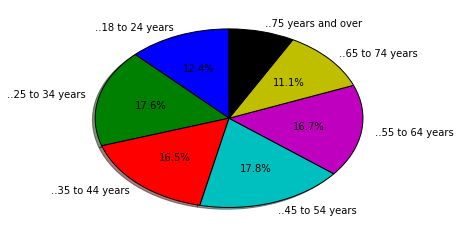

In [53]:
#total population
plt.pie(pop_breakdown, 
        labels=pop_breakdown.index.values.tolist(),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.figure(figsize=(20, 20))
plt.show()

The pie chart shows the breakdown of population by age group. The largest groups are 25-34 year olds and 45-54 year olds followed closely by 55-64 year olds. Young and new voters (aged 18-24) make up only ~12% of the population. 

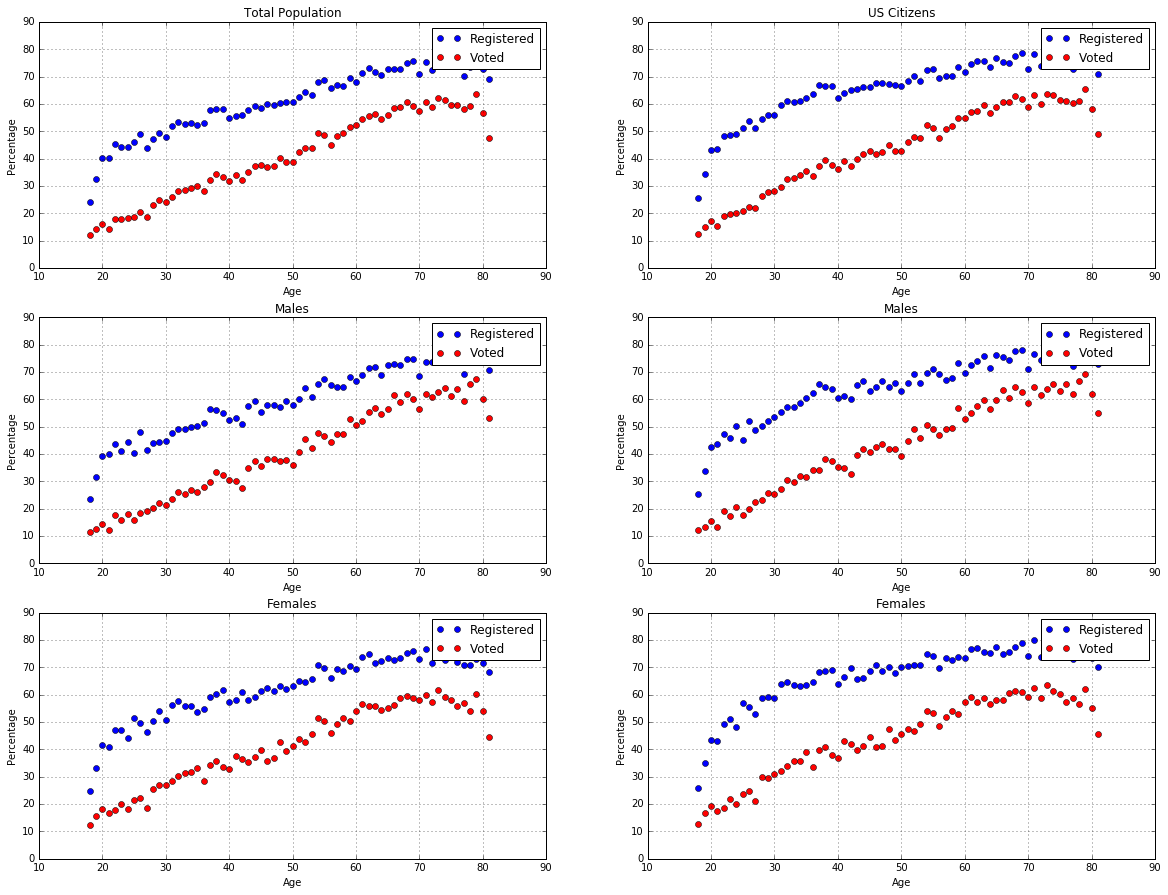

In [24]:
def plot_scatter(data, total, ax, title, column):
    ax.plot(range(18, 18+total), data[column,'Reported registered', 'Percent'].tolist(),'o', label='Registered')
    ax.plot(range(18, 18+total), data[column, 'Reported voted', 'Percent'].tolist(),'o', color='red', label='Voted')
    ax.set_title(title) 
    ax.set_xlabel('Age')
    ax.set_ylabel('Percentage')
    ax.set_ylim([0,90])
    ax.legend()
    ax.grid()
    
total = len(census_df_all['US Citizen', 'Reported registered', 'Percent'])
males = len(census_male['US Citizen', 'Reported registered', 'Percent'])
females = len(census_female['US Citizen', 'Reported registered', 'Percent'])

fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 15))
plot_scatter(census_df_all, total, ax1, 'Total Population', 'Total Population')
plot_scatter(census_male, males, ax3, 'Males', 'Total Population')
plot_scatter(census_female, females, ax5, 'Females', 'Total Population')
plot_scatter(census_df_all, total, ax2, 'US Citizens', 'US Citizen')
plot_scatter(census_male, males, ax4, 'Males', 'US Citizen')
plot_scatter(census_female, females, ax6, 'Females', 'US Citizen')

The scatter plots show that the percentage of registered voters increases with age and the percentage of those who actually voted also increases with age by approximately the same rate. The trends are also approximately the same for both men and women. 

Amongst young voters in the total population (aged 18-24), only 50% are registered to vote despite this age bracket collectively making up nearly 13% of the population. Between the ages of 18 and 20, there is a sharp increase in the percentage of voters registering (from ~23% up to ~40%). However despite nearly 40% of 20 year olds having registered to vote, less than 20% actually voted (for males this was as low as ~14%)

Voters over the age of 75 constitute ~8% of the population and there are very high levels of voting and registration with nearly 75% having registered and ~60% actually having voted. 

The increase in voter registration and actual voters is faster for women than men, with nearly 60% of women in their 30s having registered compared to only 50% for men.  

Greater percentage of U.S. citizens had registered to vote compared to non-citizens in nearly every age category, however the percentage that actually voted was very similar in the two groups. 

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**

### Interesting questions

- Find out the reasons why the voters who reported as having not voted/registered chose not to register/vote and cluster groups based on this to understand if the reasons are age/gender specific or shared across the population
- look at the percentage of non-responders to the survey by age and gender to see if there are any differences between men and women or across ages   
- identify age groups with low levels of registration/voting which can be targeted to increase voter turnout at elections
- look at voter registration by age/gender over time to see if younger voter apathy has increased/decreased 
- look at voter registration by state to identify regional differences 

### Additional data needed to answer these questions
* an additional multiple choice question to ask for the reasoning behind decision to vote/not vote
* census data from previous years
* census data grouped by state 